# Simple linear regression

## Import the relevant libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [21]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Target Variable
We want to predict GPA score using SAT score as its independent variable

## Create the regression

### Declare the dependent and independent variables

In [22]:
x = data['SAT']
y = data['GPA']

y_sm = data ['GPA']
x1_sm = data ['SAT']

In [23]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

### Regression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_matrix,y)

LinearRegression()

### R-Squared

In [27]:
model.score(x_matrix,y)

0.40600391479679765

#### OLS

In [28]:
x_sm = sm.add_constant(x1_sm)
results = sm.OLS(y_sm,x_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           7.20e-11
Time:                        14:39:43   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Coefficient

In [29]:
model.coef_

array([0.00165569])

### Intercept

In [30]:
model.intercept_

0.27504029966028076

### Interpretation

As you can see above, the intercept represent the $b_0$ of the linear regression, while coefficient represent the $b_1$

Thus, the regression model would be:

$
Y_i = 0.275 + 0.00165569 * SAT
$

### Making Predictions

In [32]:
# This method will predict the GPA based on the new SAT score, which is 1740
model.predict([[1740]])

array([3.15593751])

In [35]:
new_dataset = pd.DataFrame(data=[2000, 1780],columns=['SAT'])
new_dataset

,SAT
0,2000
1,1780


In [36]:
model.predict(new_dataset)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.5864164 , 3.22216503])

In [37]:
combined = new_dataset.join(pd.DataFrame({'prediction': model.predict(new_dataset)}))
combined

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,prediction
0,2000,3.586416
1,1780,3.222165


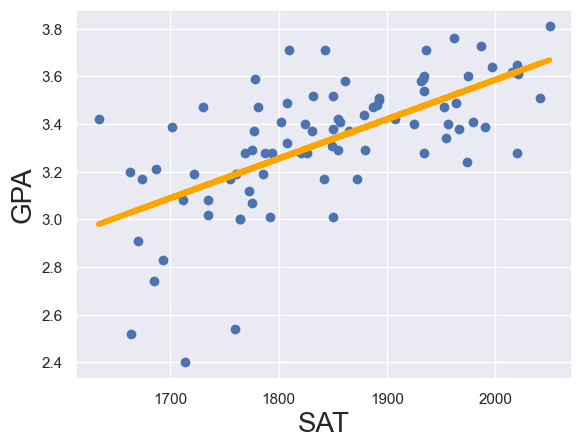

<Figure size 640x480 with 0 Axes>

In [39]:
plt.scatter(x,y)
yhat = 0.275 + 0.00165569*x
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()
plt.savefig('Simple Linear Regression Result using sklearn.png')

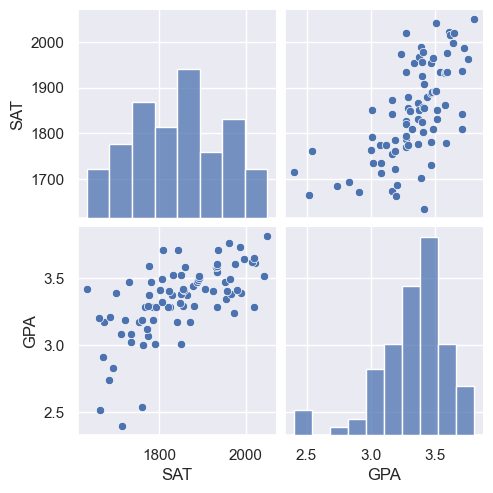

In [38]:
sns.pairplot(data)